In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import chirp, find_peaks, peak_widths

sns.set_context('paper', font_scale=1.4)
sns.set_style('whitegrid')

## Functions for finding metrics

In [69]:


def find_peak_properties(x, prominence=0.05, rel_height=0.5):
    # find peaks and ignore any peaks that have low prominence
    peaks, _ = find_peaks(x, prominence=prominence)
    widths = peak_widths(x, peaks, rel_height=rel_height)

    # find the peak heights
    peak_heights = x[peaks]

    # find the peak spacings
    left_coords = widths[2]
    right_coords = widths[3]

    spacings = []

    for i in range(len(left_coords)-1):
        spacings.append(left_coords[i+1] - right_coords[i])

    return peak_heights, widths[0], spacings

## Core model metrics (1D)

In [70]:
# load n1_1D.npy to n10_1D.npy
n1 = np.load('core/n1_1D.npy')
n2 = np.load('core/n2_1D.npy')
n3 = np.load('core/n3_1D.npy')
n4 = np.load('core/n4_1D.npy')
n5 = np.load('core/n5_1D.npy')
n6 = np.load('core/n6_1D.npy')
n7 = np.load('core/n7_1D.npy')
n8 = np.load('core/n8_1D.npy')
n9 = np.load('core/n9_1D.npy')
n10 = np.load('core/n10_1D.npy')

dist_list = [n1, n2, n3, n4, n5, n6, n7, n8, n9, n10]

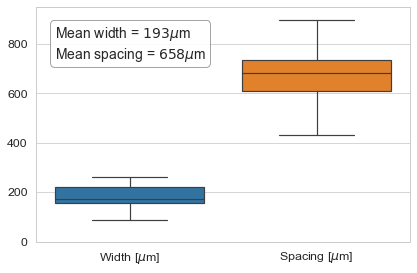

In [71]:

all_widths = []
all_heights = []
all_spacings = []

for cell_dist in dist_list:
    heights, widths, spacings = find_peak_properties(cell_dist)
    all_widths.append(widths)
    all_heights.append(heights)
    all_spacings.append(spacings)


# flatten the lists
all_widths = [item for sublist in all_widths for item in sublist]
all_heights = [item for sublist in all_heights for item in sublist]
all_spacings = [item for sublist in all_spacings for item in sublist]

# make the lists the same length by adding nan values
all_widths = all_widths + [np.nan]*(len(all_heights) - len(all_widths))
all_spacings = all_spacings + [np.nan]*(len(all_heights) - len(all_spacings))


# make a dataframe of the data 
df = pd.DataFrame({'widths': all_widths, 'spacings': all_spacings})
df = df*(3000/500) # scale to micrometers from grid points

# make a seaborn boxplot 
sns.boxplot(data=df, palette='tab10', showfliers=False)
plt.xticks([0, 1], [r'Width [$\mu$m]', r'Spacing [$\mu$m]'])
plt.ylim(0, 950)
plt.tight_layout()

#make legend to show the mean values
mean_width = np.nanmean(all_widths)*(3000/500)
mean_spacing = np.nanmean(all_spacings)*(3000/500)
# make annotation in a box
#plt.annotate(r'Mean width = {:.0f} $\mu$m'.format(mean_width), xy=(0.75, 2800))
#plt.annotate(r'Mean spacing = {:.0f} $\mu$m'.format(mean_spacing), xy=(0.75, 2600))
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

textstr = '\n'.join((
    r'Mean width = $%.0f \mu$m' % (mean_width, ),
    r'Mean spacing = $%.0f \mu$m' % (mean_spacing, )))

plt.text(-0.4, 800, textstr, ha="left", va="center", size=14, bbox=bbox_props)

plt.savefig('width_spacing_boxplot_1D.png', dpi=300)

# annotate the plot with the mean values
mean_width = np.nanmean(all_widths)
mean_height = np.nanmean(all_heights)
mean_spacing = np.nanmean(all_spacings)

#plt.annotate('Mean width = {:.2f}'.format(mean_width), xy=(0, mean_width), xytext=(0, mean_width+0.1))
core_widths = all_widths
core_spacings = all_spacings

In [72]:
#df_heights = pd.DataFrame({'Heights': all_heights})
#sns.boxplot(y='Heights', data=df_heights, showfliers=False)
#sns.violinplot(y='Heights', data=df_heights, inner='quartile')
#plt.xlabel('Maximum cell volume fraction')
#plt.ylabel('Volume fraction [-]')
#plt.tight_layout()

## Binding model metrics (1D)

In [73]:
n_b1 = np.load('binding/n_ex0.npy')
n_b2 = np.load('binding/n_ex1.npy')
n_b3 = np.load('binding/n_ex2.npy')
n_b4 = np.load('binding/n_ex3.npy')
n_b5 = np.load('binding/n_ex4.npy')

dist_list = [n_b1, n_b2, n_b3, n_b4, n_b5]

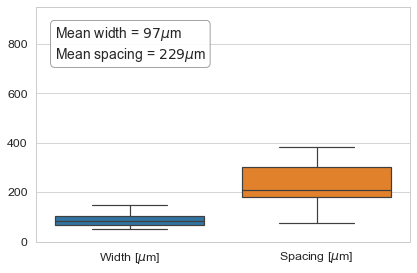

In [74]:

all_widths = []
all_heights = []
all_spacings = []

for cell_dist in dist_list:
    heights, widths, spacings = find_peak_properties(cell_dist)
    all_widths.append(widths)
    all_heights.append(heights)
    all_spacings.append(spacings)


# flatten the lists
all_widths = [item for sublist in all_widths for item in sublist]
all_heights = [item for sublist in all_heights for item in sublist]
all_spacings = [item for sublist in all_spacings for item in sublist]

# make the lists the same length by adding nan values
all_widths = all_widths + [np.nan]*(len(all_heights) - len(all_widths))
all_spacings = all_spacings + [np.nan]*(len(all_heights) - len(all_spacings))


# make a dataframe of the data 
df = pd.DataFrame({'widths': all_widths, 'spacings': all_spacings})
df = df*(3000/500) # scale to micrometers from grid points

# make a seaborn boxplot 
sns.boxplot(data=df, palette='tab10', showfliers=False)
plt.xticks([0, 1], [r'Width [$\mu$m]', r'Spacing [$\mu$m]'])
plt.ylim(0, 950)
plt.tight_layout()

#make legend to show the mean values
mean_width = np.nanmean(all_widths)*(3000/500)
mean_spacing = np.nanmean(all_spacings)*(3000/500)
# make annotation in a box
#plt.annotate(r'Mean width = {:.0f} $\mu$m'.format(mean_width), xy=(0.75, 2800))
#plt.annotate(r'Mean spacing = {:.0f} $\mu$m'.format(mean_spacing), xy=(0.75, 2600))
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

textstr = '\n'.join((
    r'Mean width = $%.0f \mu$m' % (mean_width, ),
    r'Mean spacing = $%.0f \mu$m' % (mean_spacing, )))

plt.text(-0.4, 800, textstr, ha="left", va="center", size=14, bbox=bbox_props)

plt.savefig('width_spacing_boxplot_binding_1D.png', dpi=300)

# annotate the plot with the mean values
mean_width = np.nanmean(all_widths)
mean_height = np.nanmean(all_heights)
mean_spacing = np.nanmean(all_spacings)

#plt.annotate('Mean width = {:.2f}'.format(mean_width), xy=(0, mean_width), xytext=(0, mean_width+0.1))

binding_widths = all_widths
binding_spacings = all_spacings

In [75]:
#df_heights = pd.DataFrame({'Heights': all_heights})
#sns.boxplot(y='Heights', data=df_heights, showfliers=False)
#sns.violinplot(y='Heights', data=df_heights, inner='quartile')
#plt.xlabel('Maximum cell volume fraction')
#plt.ylabel('Volume fraction [-]')
#plt.tight_layout()


### check significance

In [82]:
# remove the nan values
core_widths = [x for x in core_widths if str(x) != 'nan']
core_spacings = [x for x in core_spacings if str(x) != 'nan']
binding_widths = [x for x in binding_widths if str(x) != 'nan']
binding_spacings = [x for x in binding_spacings if str(x) != 'nan']

In [89]:
# do t-test to compare core_widths and binding_widths
import scipy.stats as stats
t, p = stats.ttest_ind(core_widths, binding_widths, equal_var=True)
print('t = {:.10f}, p = {:.10f}'.format(t, p))

t = 6.9181836855, p = 0.0000000023


In [90]:
# do t-test to compare core_spacings and binding_spacings

t, p = stats.ttest_ind(core_spacings, binding_spacings, equal_var=True)
print('t = {:.5f}, p = {:.10f}'.format(t, p))

t = 14.18186, p = 0.0000000000
